In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("..\data\micro_world_139countries.csv", encoding='latin1')

df

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143882,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,142158626,1.327724,2,22.0,2,5,...,4,4,4.0,4,5.0,1,1,0,0.0,2021
143883,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,166233385,0.271210,1,52.0,2,5,...,1,4,4.0,4,5.0,1,2,1,1.0,2021
143884,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,127205071,0.337621,1,47.0,1,1,...,4,4,4.0,4,5.0,1,2,0,0.0,2021
143885,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,201016006,2.153500,2,18.0,1,3,...,4,4,4.0,4,4.0,2,2,1,1.0,2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


In [5]:
null_counts = df.isnull().sum().sort_values(ascending=False)

null_df = pd.DataFrame({
    'Column': null_counts.index,
    'Null Count': null_counts.values
})

null_df['Null Count'] = null_df['Null Count'].astype(int)
pd.set_option('display.max_rows', None)
null_df[null_df['Null Count'] > 0]

,Column,Null Count
0,fin10_1a,143065
1,fin10_1b,143065
2,fin10_1c,143065
3,fin10_1d,143065
4,fin10_1e,143065
5,fin43e,142569
6,fin31b1_China,141866
7,fin34e,141132
8,fin14c_2_China,140768
9,fin14_2_China,140666


In [6]:
df.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)

In [7]:
columns_used = ['economy', 'female', 'age', 'inc_q', 'emp_in', 'account', 'borrowed', 'saved', 'receive_wages', 'receive_transfers', 'receive_pension', 'pay_utilities', 'anydigpayment', 'mobileowner', 'internetaccess', 'fin4', 'fin8', 'fin8b', 'fin44a', 'fin44b', 'fin44c', 'fin44d']

df = df[columns_used]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   economy            143887 non-null  object 
 1   female             143887 non-null  int64  
 2   age                143420 non-null  float64
 3   inc_q              143887 non-null  int64  
 4   emp_in             140385 non-null  float64
 5   account            143887 non-null  int64  
 6   borrowed           143887 non-null  int64  
 7   saved              143887 non-null  int64  
 8   receive_wages      143887 non-null  int64  
 9   receive_transfers  143887 non-null  int64  
 10  receive_pension    143887 non-null  int64  
 11  pay_utilities      143887 non-null  int64  
 12  anydigpayment      143887 non-null  int64  
 13  mobileowner        143887 non-null  int64  
 14  internetaccess     143887 non-null  int64  
 15  fin4               72945 non-null   float64
 16  fi

In [9]:
# dropping rows where respondant did not answer one of the target questions
finacial_worry_variables = ['fin44a', 'fin44b', 'fin44c', 'fin44d']

for variable in finacial_worry_variables:
    df = df[df[variable] != 6]

In [10]:
finacial_worry_variables = ['fin44a', 'fin44b', 'fin44c', 'fin44d']

for variable in finacial_worry_variables:
    df[variable] = df[variable].replace({1: 3, 2: 1, 3: 0, 4: 0, 5: 0})


In [11]:
df['financial_worry'] = df[finacial_worry_variables].sum(axis=1)

In [12]:
df.drop(columns=finacial_worry_variables, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143249 entries, 0 to 143886
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   economy            143249 non-null  object 
 1   female             143249 non-null  int64  
 2   age                142792 non-null  float64
 3   inc_q              143249 non-null  int64  
 4   emp_in             139767 non-null  float64
 5   account            143249 non-null  int64  
 6   borrowed           143249 non-null  int64  
 7   saved              143249 non-null  int64  
 8   receive_wages      143249 non-null  int64  
 9   receive_transfers  143249 non-null  int64  
 10  receive_pension    143249 non-null  int64  
 11  pay_utilities      143249 non-null  int64  
 12  anydigpayment      143249 non-null  int64  
 13  mobileowner        143249 non-null  int64  
 14  internetaccess     143249 non-null  int64  
 15  fin4               72698 non-null   float64
 16  fin8   

In [14]:
# consertando variáveis binárias segundo 5 lógicas diferentes
binary_variables_to_be_fixed = ['female', 'emp_in',]

for variable in binary_variables_to_be_fixed:
    df[variable] = df[variable].replace({2: 0})

binary_variables_to_be_fixed = ['receive_wages', 'receive_transfers', 'receive_pension', 'pay_utilities']

for variable in binary_variables_to_be_fixed:
    df[variable] = df[variable].replace({2: 1, 3: 1, 4: 0, 5: 0})

binary_variables_to_be_fixed = ['mobileowner', 'internetaccess', 'fin4', 'fin8']

for variable in binary_variables_to_be_fixed:
    df[variable] = df[variable].replace({2: 0, 3: 1, 4: 1})

df['fin8b'] = df['fin8b'].replace({2: 0, 3: 1, 4: 0})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143249 entries, 0 to 143886
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   economy            143249 non-null  object 
 1   female             143249 non-null  int64  
 2   age                142792 non-null  float64
 3   inc_q              143249 non-null  int64  
 4   emp_in             139767 non-null  float64
 5   account            143249 non-null  int64  
 6   borrowed           143249 non-null  int64  
 7   saved              143249 non-null  int64  
 8   receive_wages      143249 non-null  int64  
 9   receive_transfers  143249 non-null  int64  
 10  receive_pension    143249 non-null  int64  
 11  pay_utilities      143249 non-null  int64  
 12  anydigpayment      143249 non-null  int64  
 13  mobileowner        143249 non-null  int64  
 14  internetaccess     143249 non-null  int64  
 15  fin4               72698 non-null   float64
 16  fin8   

Para fin4 e fin8, imputarei os valores ausentes como "não", pois a ausência provavelmente significa que o respondente não possui uma conta ou possui apenas uma conta de dinheiro móvel, o que implica que não possui cartão. Isso está alinhado com o padrão de salto da pesquisa, em que não foram questionados os não correntistas (excluindo dinheiro móvel).

Para fin8b, impute os valores ausentes com uma categoria "não aplicável", refletindo que, sem um cartão de crédito, o pagamento integral é irrelevante.

In [18]:
# renomeando variáveis

df = df.rename(columns={'fin4': 'debit_card',
                   'fin8': 'credit_card',
                     'fin8b': 'paid_balance_regularly',
})

In [ ]:
df[['debit_card', 'credit_card']] = df[['debit_card', 'credit_card']].fillna(0)
df['paid_balance_regularly'] = df['paid_balance_regularly'].fillna(-1)

In [ ]:
#dropando nulos, pois restam poucos
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139364 entries, 0 to 143886
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   economy                 139364 non-null  object 
 1   female                  139364 non-null  int64  
 2   age                     139364 non-null  float64
 3   inc_q                   139364 non-null  int64  
 4   emp_in                  139364 non-null  float64
 5   account                 139364 non-null  int64  
 6   borrowed                139364 non-null  int64  
 7   saved                   139364 non-null  int64  
 8   receive_wages           139364 non-null  int64  
 9   receive_transfers       139364 non-null  int64  
 10  receive_pension         139364 non-null  int64  
 11  pay_utilities           139364 non-null  int64  
 12  anydigpayment           139364 non-null  int64  
 13  mobileowner             139364 non-null  int64  
 14  internetaccess          1

In [ ]:
# convertendo variaveis float para int
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
for col in float_columns:
    df[col] = df[col].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139364 entries, 0 to 143886
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   economy                 139364 non-null  object
 1   female                  139364 non-null  int64 
 2   age                     139364 non-null  int64 
 3   inc_q                   139364 non-null  int64 
 4   emp_in                  139364 non-null  int64 
 5   account                 139364 non-null  int64 
 6   borrowed                139364 non-null  int64 
 7   saved                   139364 non-null  int64 
 8   receive_wages           139364 non-null  int64 
 9   receive_transfers       139364 non-null  int64 
 10  receive_pension         139364 non-null  int64 
 11  pay_utilities           139364 non-null  int64 
 12  anydigpayment           139364 non-null  int64 
 13  mobileowner             139364 non-null  int64 
 14  internetaccess          139364 non-null  

## Exploratory Data Analysis

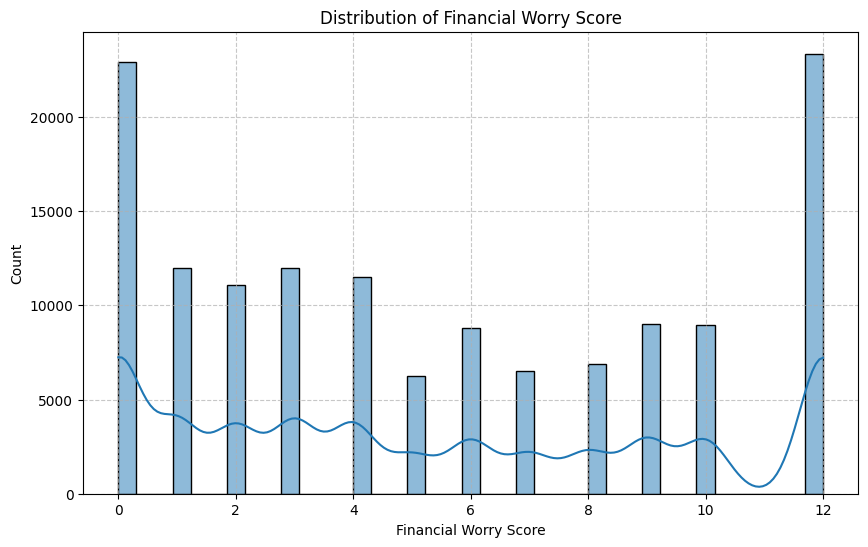

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['financial_worry'], kde=True)
plt.title('Distribuição de Financial Worry Score')
plt.xlabel('Financial Worry Score')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

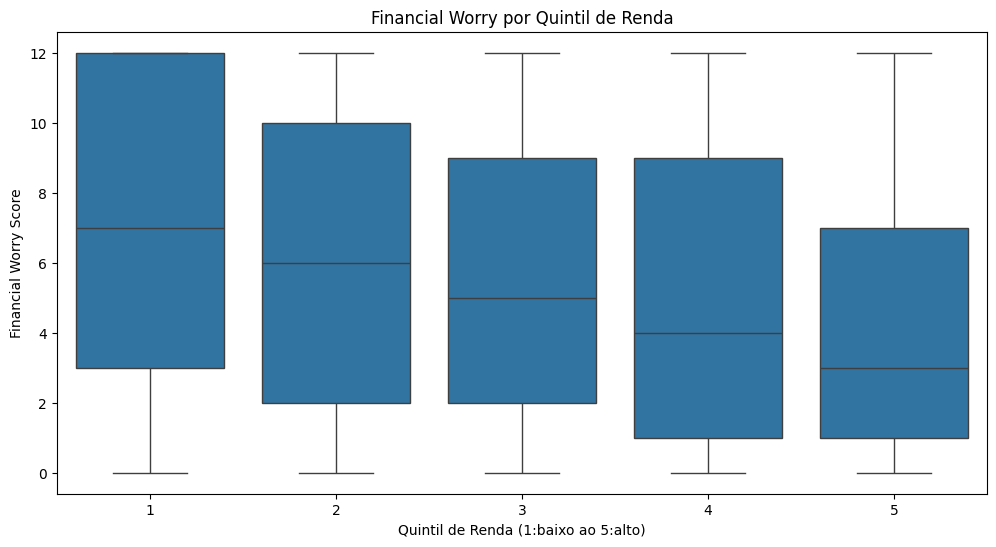

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='inc_q', y='financial_worry', data=df)
plt.title('Financial Worry por Quintil de Renda')
plt.xlabel('Quintil de Renda (1:baixo ao 5:alto)')
plt.ylabel('Financial Worry Score')
plt.show()

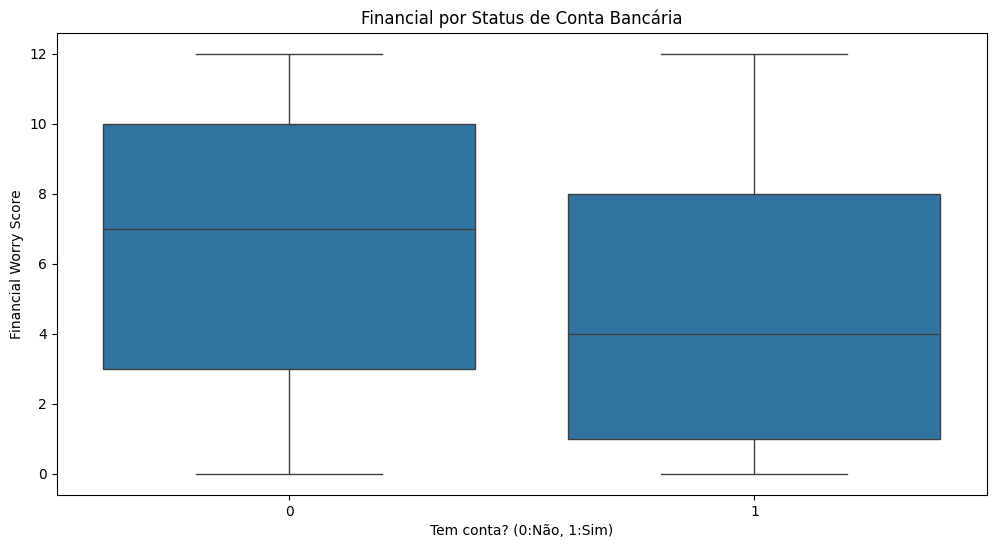

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='account', y='financial_worry', data=df)
plt.title('Financial por Status de Conta Bancária')
plt.xlabel('Tem conta? (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

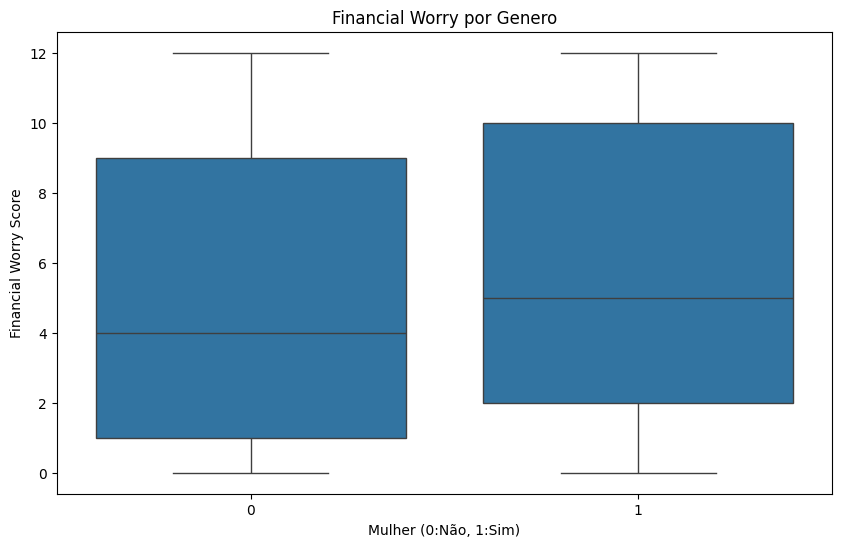

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='female', y='financial_worry', data=df)
plt.title('Financial Worry por Genero')
plt.xlabel('Mulher (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

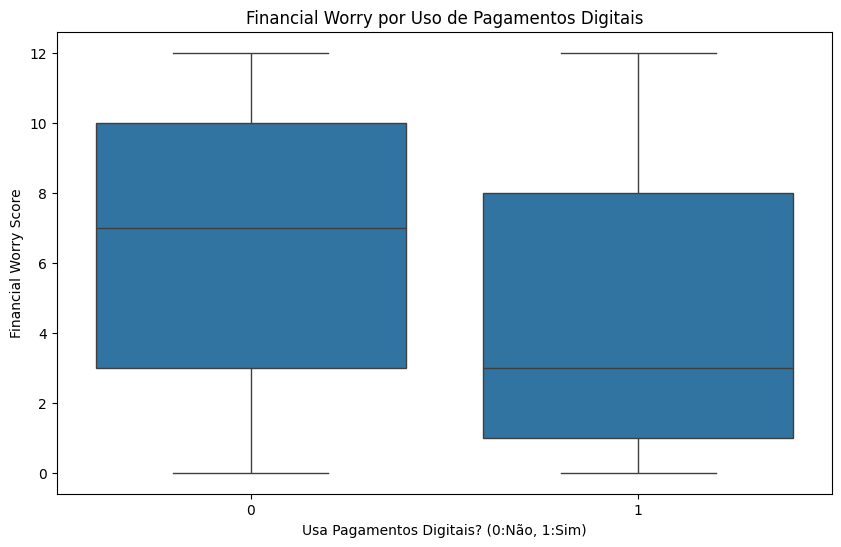

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='anydigpayment', y='financial_worry', data=df)
plt.title('Financial Worry por Uso de Pagamentos Digitais')
plt.xlabel('Usa Pagamentos Digitais? (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

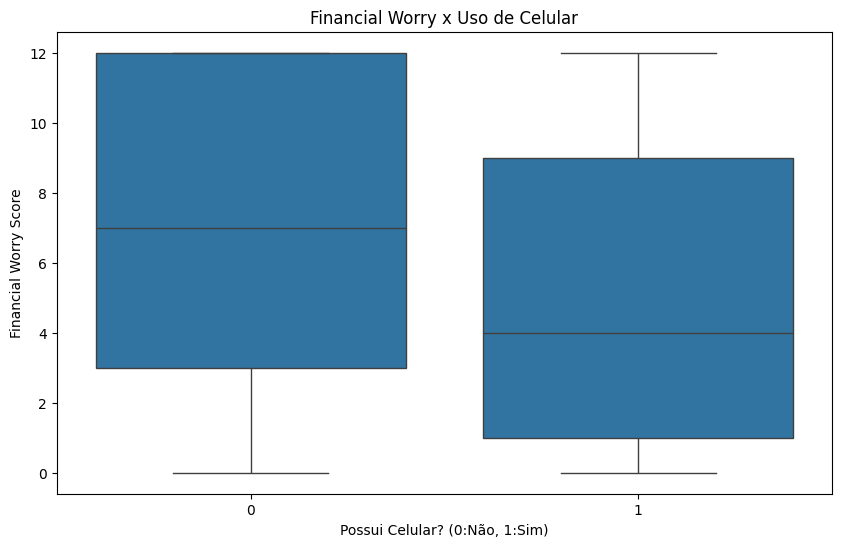

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mobileowner', y='financial_worry', data=df)
plt.title('Financial Worry x Uso de Celular')
plt.xlabel('Possui Celular? (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

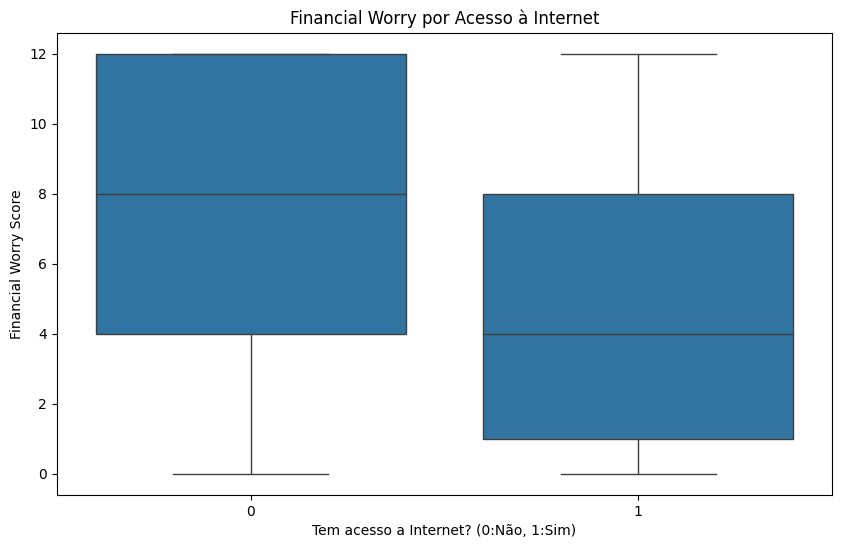

In [37]:
# Financial worry by internet access
plt.figure(figsize=(10, 6))
sns.boxplot(x='internetaccess', y='financial_worry', data=df)
plt.title('Financial Worry por Acesso à Internet')
plt.xlabel('Tem acesso a Internet? (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

C:\Users\Mezzow Tecnologia\AppData\Local\Temp\ipykernel_6232\304015768.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_worry.index, y=region_worry.values, palette='Set2')


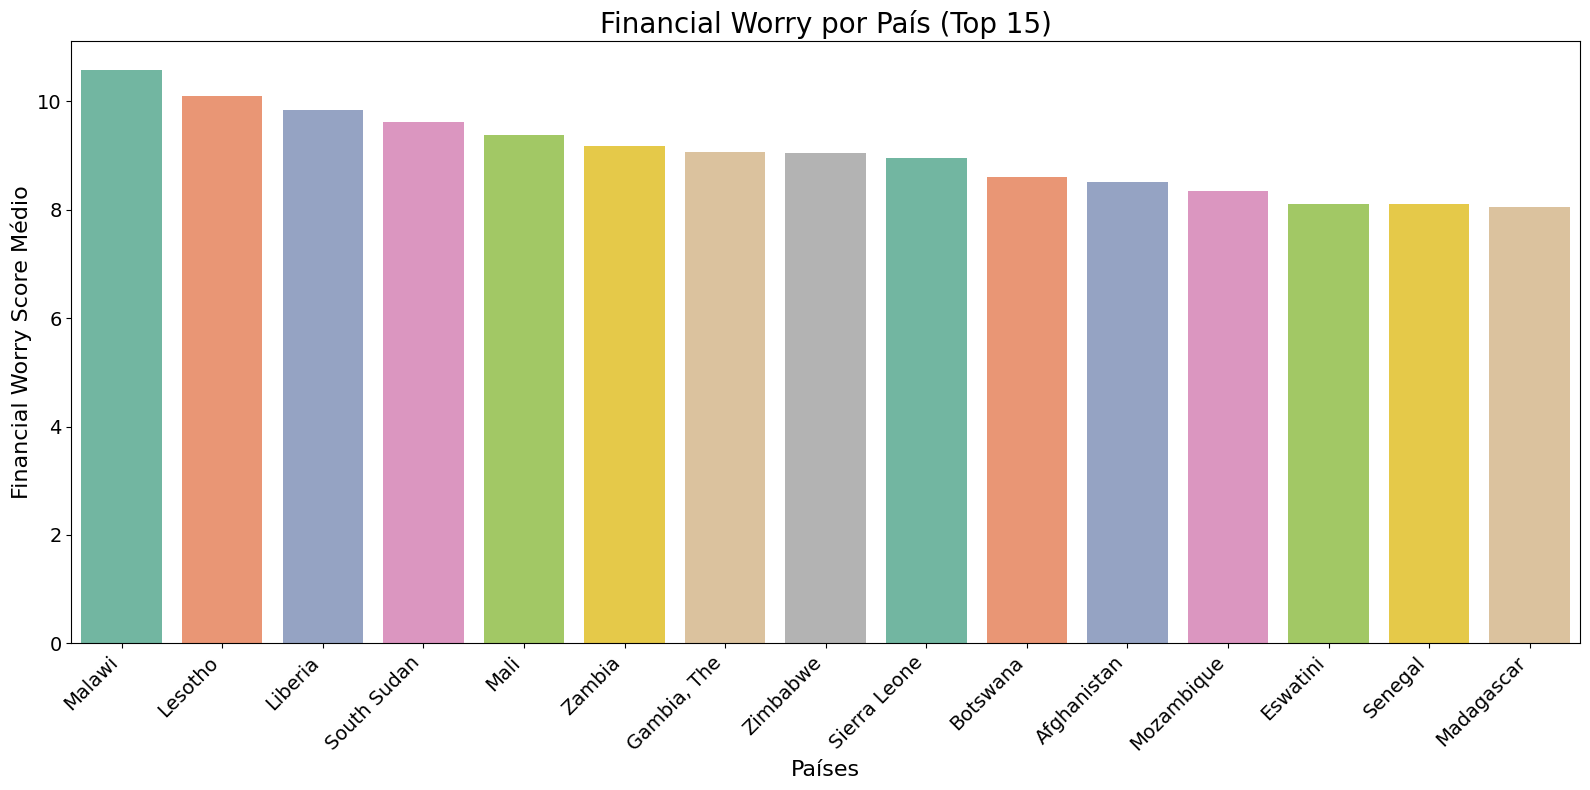

In [40]:
plt.figure(figsize=(16, 8))
region_worry = (
    df.groupby('economy')['financial_worry']
      .mean()
      .sort_values(ascending=False)
      .head(15)
)
sns.barplot(x=region_worry.index, y=region_worry.values, palette='Set2')
plt.title('Financial Worry por País (Top 15)', fontsize=20)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Financial Worry Score Médio', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Mezzow Tecnologia\AppData\Local\Temp\ipykernel_6232\3402948997.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_worry.index, y=region_worry.values, palette='Set2')


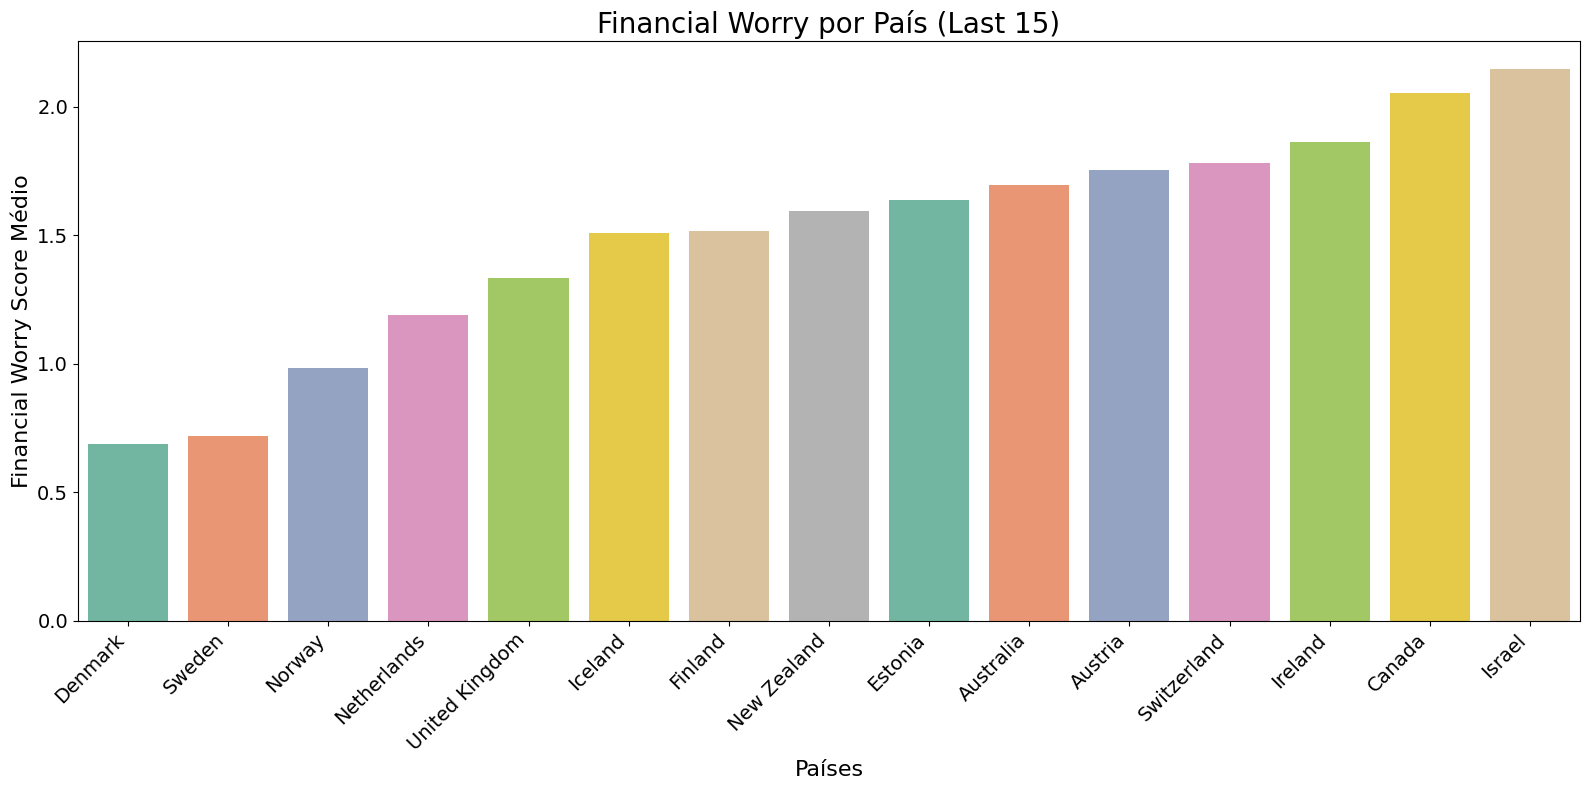

In [41]:
plt.figure(figsize=(16, 8))
region_worry = (
    df.groupby('economy')['financial_worry']
      .mean()
      .sort_values(ascending=True)
      .head(15)
)
sns.barplot(x=region_worry.index, y=region_worry.values, palette='Set2')
plt.title('Financial Worry por País (Last 15)', fontsize=20)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Financial Worry Score Médio', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

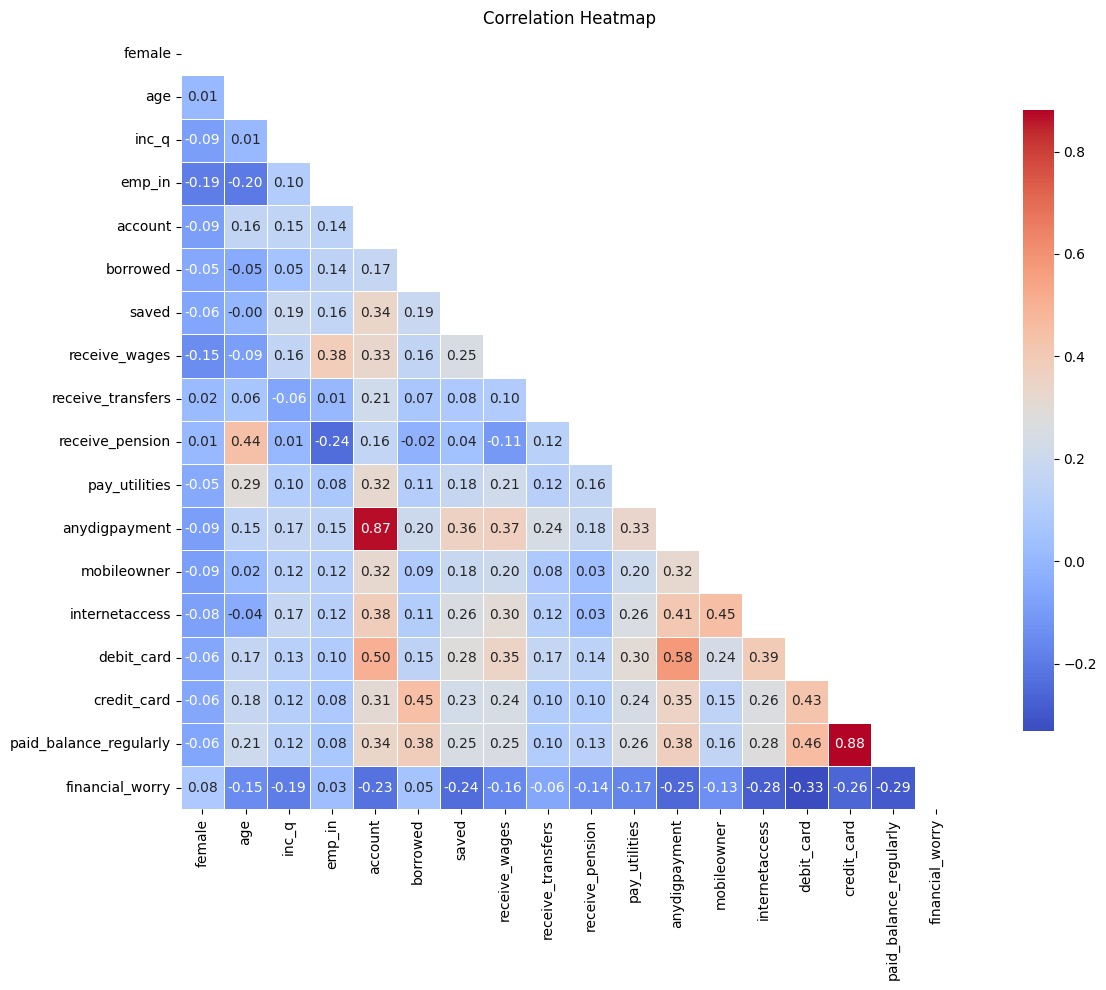

In [35]:
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [42]:
# one-hot encoding da variavel economy
df = pd.get_dummies(df, columns=['economy'])

In [44]:
df.to_csv("..\data\model_data", index=False, encoding='latin1')